Kaggle dataset from: https://www.kaggle.com/fedesoriano/heart-failure-prediction


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


# Info about the data


1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]






# Load data

In [2]:
df = pd.read_csv('heart.csv')     # Load the dataset

# Explore data

In [3]:
df.head(5) # See the 5 first lines

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
type(df) # class

pandas.core.frame.DataFrame

In [5]:
print(df.shape) # Dimension
print("Number of columns: " + str(df.shape[1])) # nº Columns
print("Number of rows: " + str(df.shape[0])) # nº rows

(918, 12)
Number of columns: 12
Number of rows: 918


In [6]:
## Count distinct values
# Count distinct values in a specific column
print("Number of distinct values in the column HeartDisease: " + str(df["HeartDisease"].nunique()))
# Count distinct values in all columns
df.nunique()


Number of distinct values in the column HeartDisease: 2


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
## Number of Na values
# Count Na in a specific column
print("Number of NA values in the column HeartDisease: " + str(df["HeartDisease"].isna().sum())) 
# Count NA in all columns
df.isna().sum()

Number of NA values in the column HeartDisease: 0


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
## Categorical and numeric columns
cols = df.columns # Column names
num_cols = df._get_numeric_data().columns # Columns with numeric data
print("Number of numeric columns: " + str(len(num_cols))) # Number of columns with numeric data
print("Number of categorical columns: " + str(len(cols)-len(num_cols))) # Number of columns with categorical data

Number of numeric columns: 7
Number of categorical columns: 5


In [9]:
# Select numeric columns
df_num= df[num_cols]
print("Mean of numeric columns: " + str(df_num.mean())) # Mean of numeric columns
print("Variance of numeric columns: " + str(df_num.var()))

Mean of numeric columns: Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64
Variance of numeric columns: Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64


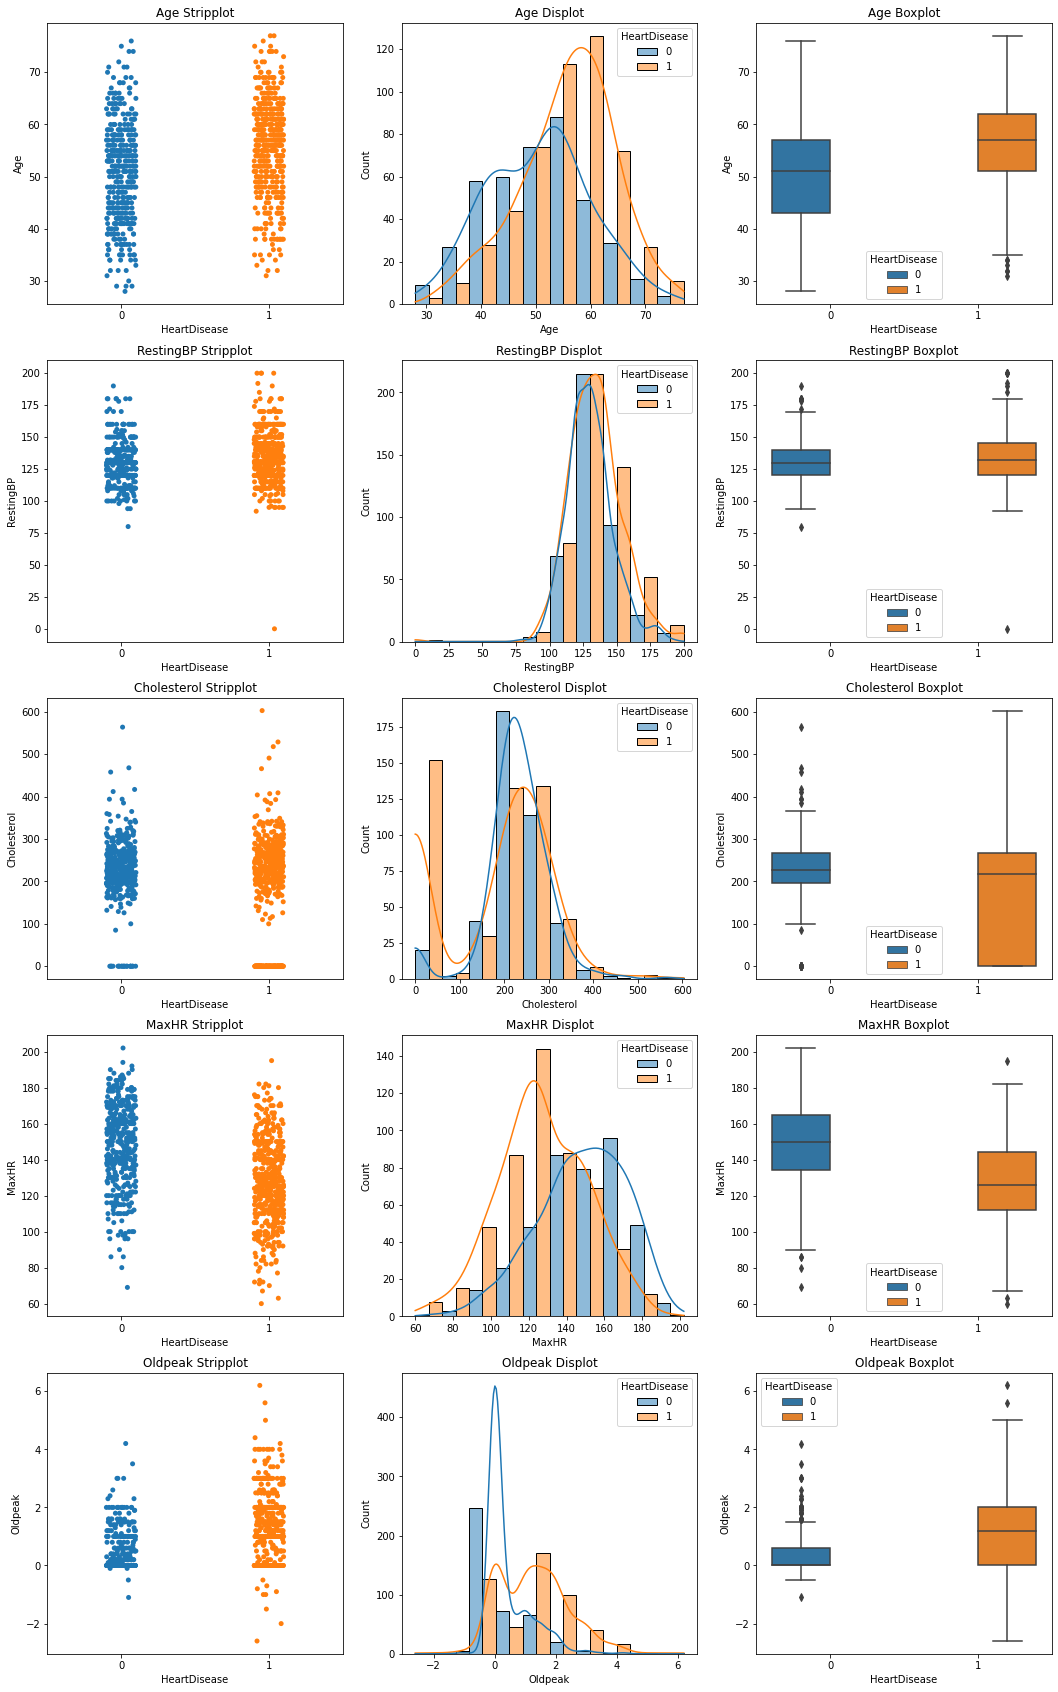

In [10]:
# Plot each categorical variable vs HeartDisease
fig, axes = plt.subplots(5, 3, figsize = (18, 30))

num_feats = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
#for k, col in zip(range(len(num_feats)), num_feats):
for k, col in enumerate(num_feats):
    sns.stripplot(ax = axes[k][0], x = 'HeartDisease', y = col, data = df, jitter = True)
    axes[k][0].set_title(f'{col} Stripplot')

    sns.histplot(ax = axes[k][1], x = col, data = df, kde = True, bins = 10, hue = 'HeartDisease', multiple = 'dodge')
    axes[k][1].set_title(f'{col} Displot')

    sns.boxplot(ax = axes[k][2], x = 'HeartDisease', y = col, data = df, hue = 'HeartDisease')
    axes[k][2].set_title(f'{col} Boxplot')


In [11]:
## Count number males and females
#(unique, counts) = np.unique(df["Sex"], return_counts=True)
#print(unique) # Class
#print(counts) # Counts in each class
#frequencies = np.asarray((unique, counts)).T
#print(frequencies)
print(df["Sex"].value_counts())

M    725
F    193
Name: Sex, dtype: int64


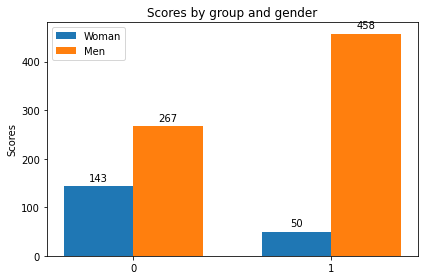

In [13]:
# set width of bars
width = 0.35
labels = np.array(["0","1"])
x = np.arange(df["HeartDisease"].nunique())
woman = df[df["Sex"]=="F"]
woman_yes = woman[woman["HeartDisease"]==0].shape[0]
woman_no = woman[woman["HeartDisease"]==1].shape[0]
womans = np.array([woman_yes,woman_no])
men = df[df["Sex"]=="M"]
men_yes = men[men["HeartDisease"]==0].shape[0]
men_no = men[men["HeartDisease"]==1].shape[0]
mens = np.array([men_yes,men_no])

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, womans, width, label='Woman')
rects2 = ax.bar(x + width/2, mens, width, label='Men')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()



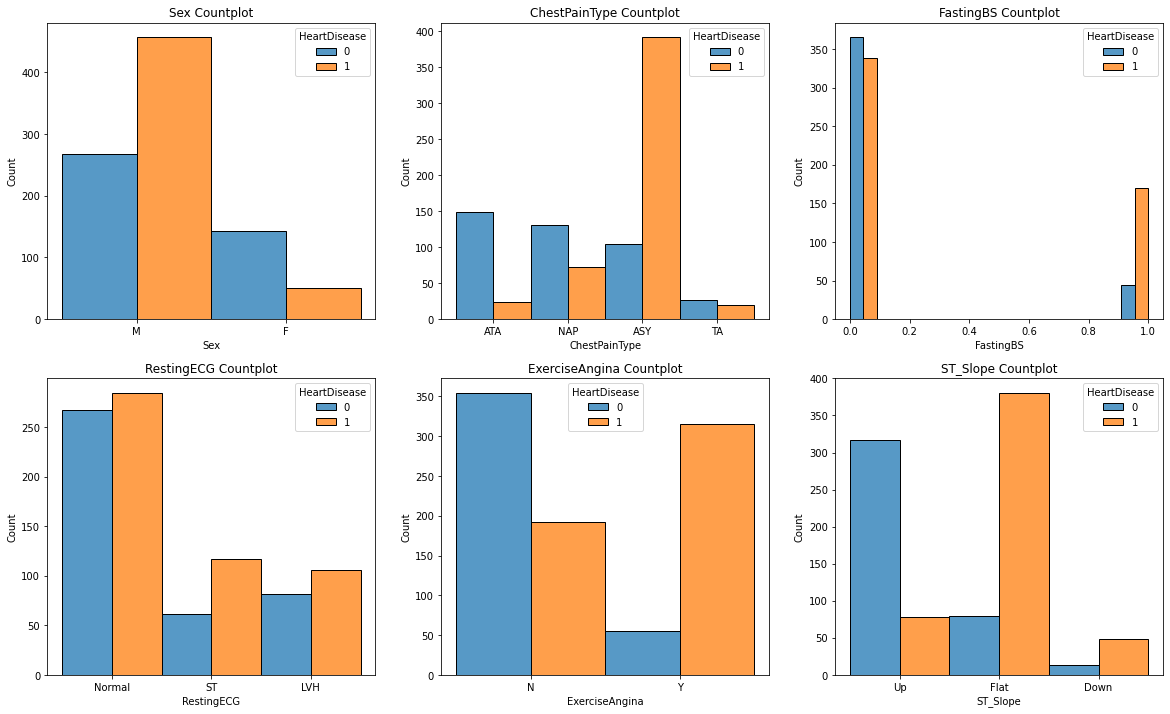

In [14]:
# Let's barplot the counts for each categorical feature
fig, axes = plt.subplots(2, 3, figsize=(20,12))

cat_feats = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for i, col in enumerate(cat_feats):
    sns.histplot(ax = axes[i//3][i%3], x = col, data = df, hue = 'HeartDisease', multiple = 'dodge', bins = 'auto')
    axes[i//3][i%3].set_title(f'{col} Countplot')

# Predict Heart Failure

In [15]:
# Get x and y dataframes
X = df.iloc[:,:11]
X.head()
y = df.iloc[:,11]


In [16]:
# Convert categorical variables to variables dummy
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
X.head(5)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1


## Split into train and test


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [49]:
# Initialise pandas dataframe for results
df_results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1-score', 'ROC-AUC'])
df_results.head()

,Model,Accuracy,Recall,Precision,F1-score,ROC-AUC


In [59]:
# Initialise the model
svm_clf = SVC()

# Fit the model
svm_model = svm_clf.fit(X_train, y_train)

In [51]:
a = X_test.iloc[0]
print(a)


Age                   63.0
RestingBP            140.0
Cholesterol          195.0
MaxHR                179.0
Oldpeak                0.0
Sex_F                  1.0
Sex_M                  0.0
ChestPainType_ASY      0.0
ChestPainType_ATA      1.0
ChestPainType_NAP      0.0
ChestPainType_TA       0.0
FastingBS_0            1.0
FastingBS_1            0.0
RestingECG_LVH         0.0
RestingECG_Normal      1.0
RestingECG_ST          0.0
ExerciseAngina_N       1.0
ExerciseAngina_Y       0.0
ST_Slope_Down          0.0
ST_Slope_Flat          0.0
ST_Slope_Up            1.0
Name: 668, dtype: float64


In [62]:
svm_predictions = svm_clf.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, svm_predictions)
print(accuracy)

0.6902173913043478
